In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
Profitdf = pd.read_csv('Profit.csv')
Main_df = pd.read_csv('final_data_downloaded.csv')



In [4]:
Profitdf.head()

,Port_IDs,total_profit,total_investment,ROI
0,3768170840939476993,1243.440674,766.603827,162.201209
1,3944658614777849089,41508.818686,29044.021840,142.916910
2,3936410995029308417,237857.799757,179350.000000,132.622135
3,4037073643537925121,18560.177367,20435.729690,90.822191
4,4030392204221219329,10465.486268,16762.398000,62.434302


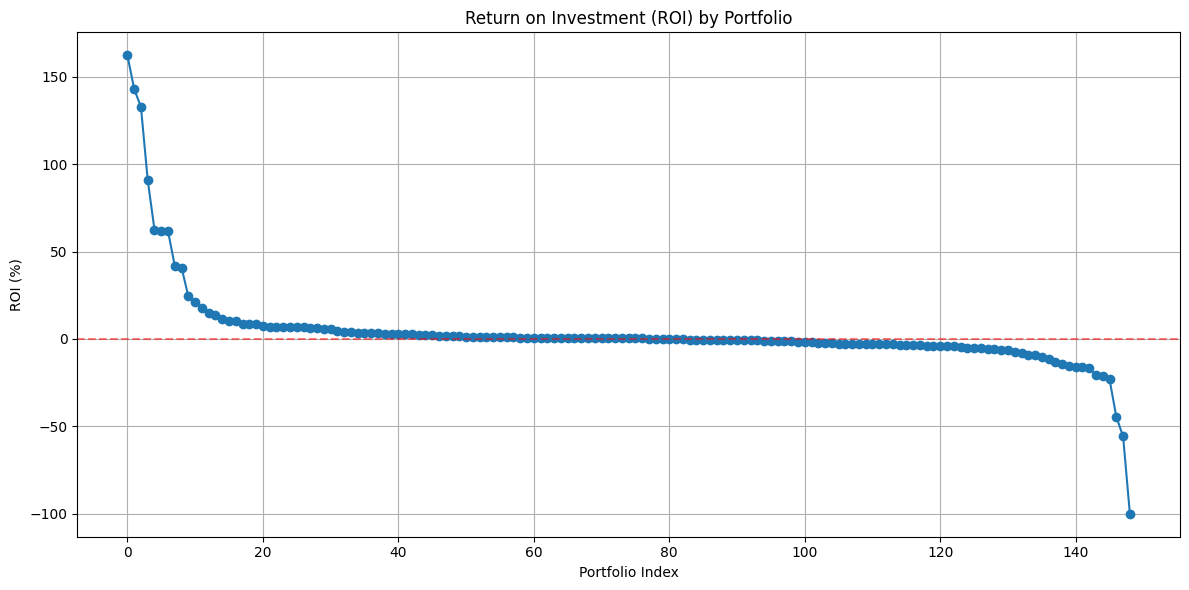

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(len(Profitdf)), Profitdf['ROI'], marker='o')
plt.title('Return on Investment (ROI) by Portfolio')
plt.xlabel('Portfolio Index')
plt.ylabel('ROI (%)')
plt.grid(True)

# Add a horizontal line at ROI = 0 to show profit/loss threshold
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


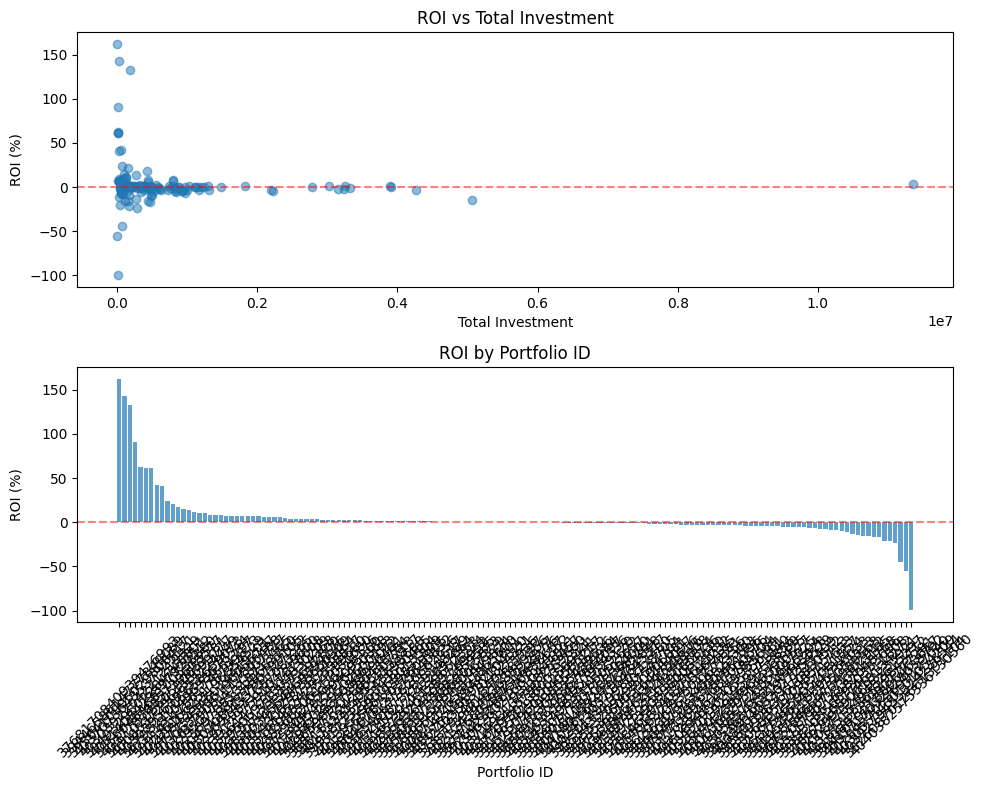

In [20]:
# Create a figure with two subplots
plt.figure(figsize=(10,8))

# First subplot - Scatter plot
plt.subplot(2,1,1)
plt.scatter(Profitdf['total_investment'], Profitdf['ROI'], alpha=0.5)
plt.title('ROI vs Total Investment')
plt.xlabel('Total Investment')
plt.ylabel('ROI (%)')

# Add a horizontal line at ROI = 0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Second subplot - Bar plot
plt.subplot(2,1,2)
plt.bar(range(len(Profitdf)), Profitdf['ROI'], alpha=0.7)
plt.xticks(range(len(Profitdf)), Profitdf['Port_IDs'], rotation=45)
plt.title('ROI by Portfolio ID')
plt.xlabel('Portfolio ID')
plt.ylabel('ROI (%)')

# Add a horizontal line at ROI = 0
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



In [34]:
Main_df = Main_df[['Port_IDs', 'activeBuy', 'qty', 'realizedProfit','price_quantity']]
Main_df.head()

,Port_IDs,activeBuy,qty,realizedProfit,price_quantity
0,3925368433214965504,True,15.0,0.0,1988.05500
1,3925368433214965504,False,11484.0,0.0,1398.98088
2,3925368433214965504,False,1621.0,0.0,197.47022
3,3925368433214965504,True,136.0,0.0,16.56752
4,3925368433214965504,True,757.0,0.0,92.21774


In [9]:

grouped_df = Main_df.groupby('Port_IDs').agg({
    'qty': 'sum',
    'realizedProfit': 'sum', 
    'price_quantity': 'sum'
}).reset_index()

grouped_df.head()



,Port_IDs,qty,realizedProfit,price_quantity
0,3672754654734989568,1.524255e+07,566.597660,1.189369e+05
1,3733192481840423936,3.439270e+03,2923.977200,1.164472e+06
2,3768170840939476993,5.617972e+04,243.668899,2.775560e+03
3,3784403294629753856,1.557960e+07,2521.814305,7.421060e+05
4,3786761687746711808,2.741620e+03,205.021400,6.174001e+04


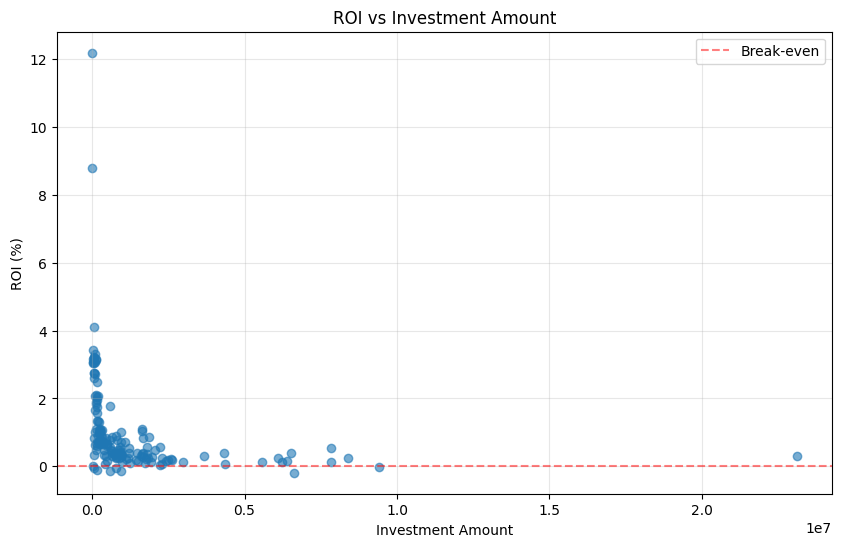

In [21]:
# Calculate ROI for visualization
grouped_df['ROI'] = (grouped_df['realizedProfit'] / grouped_df['price_quantity']) * 100

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['price_quantity'], grouped_df['ROI'], alpha=0.6)
plt.title('ROI vs Investment Amount')
plt.xlabel('Investment Amount')
plt.ylabel('ROI (%)')

# Add a horizontal line at ROI = 0 to show break-even point
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Break-even')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


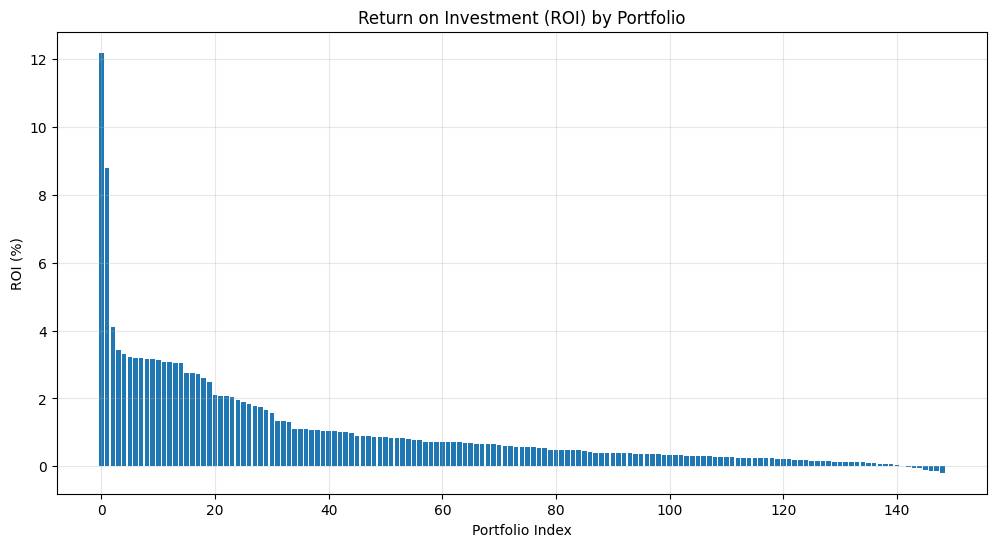

In [22]:
# Create a bar plot of ROI by portfolio
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped_df)), grouped_df['ROI'])
plt.title('Return on Investment (ROI) by Portfolio')
plt.xlabel('Portfolio Index') 
plt.ylabel('ROI (%)')
plt.grid(True, alpha=0.3)
plt.show()


In [10]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Port_IDs        149 non-null    int64  
 1   qty             149 non-null    float64
 2   realizedProfit  149 non-null    float64
 3   price_quantity  149 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [23]:
# Calculate ROI and create a new dataframe with relevant columns
roi_df = pd.DataFrame()
roi_df['Port_IDs'] = grouped_df['Port_IDs']
roi_df['realizedProfit'] = grouped_df['realizedProfit']
roi_df['investment'] = grouped_df['price_quantity']
roi_df['ROI'] = (grouped_df['realizedProfit'] / grouped_df['price_quantity']) * 100

# Sort by ROI in descending order
roi_df = roi_df.sort_values('ROI', ascending=False)

# Display the results
print("\nPortfolio Return on Investment (ROI):")
print(roi_df.head())




Portfolio Return on Investment (ROI):
                Port_IDs  realizedProfit    investment        ROI
8    3826087012661391104      532.656974   4373.742334  12.178517
2    3768170840939476993      243.668899   2775.560153   8.779089
58   3977234346014419201     2427.292831  59166.712085   4.102464
111  4029507714735307777     1537.899960  44938.914960   3.422201
103  4023697881318718465     3151.950620  95292.775420   3.307649


In [24]:
# Rename grouped_df to Main_Profit_1 for consistency with profit calculation methods
Main_Profit_1 = grouped_df.copy()

# Rename Profitdf to Main_Profit_2 for consistency with profit calculation methods 
Main_Profit_2 = Profitdf.copy()




# Profit Calculation Methods

I have calculated the PROFIT using two different approaches due to lack of clarity with `realized_profit`:

1. **Method 1: Using Realized Profit as Net Profit/Loss**
   - Directly used the realized profit column as the net profit/loss amount
   - This assumes the realized profit already accounts for all costs and fees

2. **Method 2: Manual Profit Calculation from Transactions** 
   - Calculated profit by analyzing individual BUY and SELL transactions
   - Formula used: (SELL price - BUY price) * Quantity - Fees
   - This provides a more detailed view of actual trading profits

   ### I will calculate all metrics and performance indicators using both profit calculation methods to ensure a comprehensive analysis and comparison.


`Main_Profit_1` had Profit calcuted using Method 1.

`Main_Profit_2` had Profit calcuted using Method 2.



In [27]:
Main_Profit_1.head()




,Port_IDs,qty,realizedProfit,price_quantity,ROI
8,3826087012661391104,75972.46,532.656974,4373.742334,12.178517
2,3768170840939476993,56179.72,243.668899,2775.560153,8.779089
58,3977234346014419201,1057832.00,2427.292831,59166.712085,4.102464
111,4029507714735307777,218762.00,1537.899960,44938.914960,3.422201
103,4023697881318718465,580886.00,3151.950620,95292.775420,3.307649


In [26]:

Main_Profit_2.head()


,Port_IDs,total_profit,total_investment,ROI
0,3768170840939476993,1243.440674,766.603827,162.201209
1,3944658614777849089,41508.818686,29044.021840,142.916910
2,3936410995029308417,237857.799757,179350.000000,132.622135
3,4037073643537925121,18560.177367,20435.729690,90.822191
4,4030392204221219329,10465.486268,16762.398000,62.434302


# Calculating Key Trading Performance Metrics

 1. ROI (Return on Investment)
     - Measures the percentage return relative to investment

 2. PnL (Profit and Loss)
    - Total monetary gain or loss from trading

 3. Sharpe Ratio
    - Risk-adjusted return metric
    - Higher ratio indicates better risk-adjusted performance

 4. MDD (Maximum Drawdown)
    - Largest peak-to-trough decline
    - Measures downside risk

 5. Win Rate
    - Percentage of profitable trades

 6. Win Positions & Total Positions
    - Number of winning trades
    - Total number of trades executed

#####  ⭐ We'll calculate these metrics for both profit calculation methods (Method 1 & 2) ⭐


#  📈 SHARPE RATIO
 
|                            Formula
 $$ \text{Sharpe Ratio} = \frac{R_x - R_f}{\sigma_{R_x}} $$
 
 ## Components
 - **$R_x$**: Expected portfolio return
 - **$R_f$**: Risk-free rate of return
 - **$\sigma_{R_x}$**: Standard deviation of portfolio return (volatility)



In [43]:
# Calculate daily returns for each Port_ID
daily_returns_1 = Main_Profit_1.groupby('Port_IDs')['realizedProfit'].sum() / 60
daily_returns_2 = Main_Profit_2.groupby('Port_IDs')['total_profit'].sum() / 60

# Assume an annual risk-free rate of 5% (adjust as needed)
annual_risk_free_rate = 0.05 # 5%
daily_risk_free_rate = annual_risk_free_rate / 365

# Calculate Sharpe Ratio for each Port_ID - Method 1
port_mean_1 = Main_Profit_1.groupby('Port_IDs')['realizedProfit'].mean()
port_std_1 = Main_Profit_1.groupby('Port_IDs')['realizedProfit'].std()
sharpe_ratio_by_port_1 = (port_mean_1 - daily_risk_free_rate) / port_std_1

# Calculate Sharpe Ratio for each Port_ID - Method 2  
port_mean_2 = Main_Profit_2.groupby('Port_IDs')['total_profit'].mean()
port_std_2 = Main_Profit_2.groupby('Port_IDs')['total_profit'].std()
sharpe_ratio_by_port_2 = (port_mean_2 - daily_risk_free_rate) / port_std_2

print("Sharpe Ratios by Port_ID (Method 1):")
print(sharpe_ratio_by_port_1)
print("\nSharpe Ratios by Port_ID (Method 2):")
print(sharpe_ratio_by_port_2)


Sharpe Ratios by Port_ID (Method 1):
Port_IDs
3672754654734989568   NaN
3733192481840423936   NaN
3768170840939476993   NaN
3784403294629753856   NaN
3786761687746711808   NaN
                       ..
4039279455324236544   NaN
4040382575336130560   NaN
4040843843196854529   NaN
4041804592937345281   NaN
4041860229502600193   NaN
Name: realizedProfit, Length: 149, dtype: float64

Sharpe Ratios by Port_ID (Method 2):
Port_IDs
3672754654734989568   NaN
3733192481840423936   NaN
3768170840939476993   NaN
3784403294629753856   NaN
3786761687746711808   NaN
                       ..
4039279455324236544   NaN
4040382575336130560   NaN
4040843843196854529   NaN
4041804592937345281   NaN
4041860229502600193   NaN
Name: total_profit, Length: 149, dtype: float64


In [44]:
# Diagnostic print statements
print("Method 1 Statistics:")
print("Mean values:", port_mean_1.head())
print("Standard deviations:", port_std_1.head())

print("\nMethod 2 Statistics:")
print("Mean values:", port_mean_2.head())
print("Standard deviations:", port_std_2.head())

# Modified Sharpe Ratio calculation with error handling
def calculate_sharpe_ratio(mean_returns, std_returns, risk_free_rate):
    # Add small constant to avoid division by zero
    epsilon = 1e-10
    
    # Handle cases where std is zero or very close to zero
    valid_std = np.where(std_returns < epsilon, epsilon, std_returns)
    
    return (mean_returns - risk_free_rate) / valid_std

# Recalculate Sharpe ratios
sharpe_ratio_by_port_1 = calculate_sharpe_ratio(port_mean_1, port_std_1, daily_risk_free_rate)
sharpe_ratio_by_port_2 = calculate_sharpe_ratio(port_mean_2, port_std_2, daily_risk_free_rate)

# Print results
print("\nUpdated Sharpe Ratios (Method 1):")
print(sharpe_ratio_by_port_1.head())
print("\nUpdated Sharpe Ratios (Method 2):")
print(sharpe_ratio_by_port_2.head())

Method 1 Statistics:
Mean values: Port_IDs
3672754654734989568     566.597660
3733192481840423936    2923.977200
3768170840939476993     243.668899
3784403294629753856    2521.814305
3786761687746711808     205.021400
Name: realizedProfit, dtype: float64
Standard deviations: Port_IDs
3672754654734989568   NaN
3733192481840423936   NaN
3768170840939476993   NaN
3784403294629753856   NaN
3786761687746711808   NaN
Name: realizedProfit, dtype: float64

Method 2 Statistics:
Mean values: Port_IDs
3672754654734989568    -4499.278968
3733192481840423936     3385.679716
3768170840939476993     1243.440674
3784403294629753856   -13290.165306
3786761687746711808    -3679.497450
Name: total_profit, dtype: float64
Standard deviations: Port_IDs
3672754654734989568   NaN
3733192481840423936   NaN
3768170840939476993   NaN
3784403294629753856   NaN
3786761687746711808   NaN
Name: total_profit, dtype: float64

Updated Sharpe Ratios (Method 1):
Port_IDs
3672754654734989568   NaN
3733192481840423936   Na